In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Carregar os dados
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
# Separar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

In [4]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Aplicar undersampling
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [6]:
# Treinar o modelo Random Forest com os dados balanceados
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [7]:
# Treinar outro modelo para comparação, por exemplo, Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

In [8]:
# Treinar o modelo XGBoost com os dados balanceados
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
# Treinar o modelo SVM com os dados balanceados
svm_clf = SVC(random_state=42)
svm_clf.fit(X_resampled, y_resampled)

SVC(random_state=42)

In [10]:
# Avaliar os modelos usando k-fold cross-validation
k=5
rf_cv_scores = cross_val_score(rf_clf, X_resampled, y_resampled, cv=k)
dt_cv_scores = cross_val_score(dt_clf, X_resampled, y_resampled, cv=k)
xgb_cv_scores = cross_val_score(xgb_clf, X_resampled, y_resampled, cv=k)
svm_cv_scores = cross_val_score(svm_clf, X_resampled, y_resampled, cv=k)

print(f'Acurácia média do Random Forest (k-fold CV): {rf_cv_scores.mean():.2f}')
print(f'Acurácia média do Decision Tree (k-fold CV): {dt_cv_scores.mean():.2f}')
print(f'Acurácia média do XGBoost (k-fold CV): {xgb_cv_scores.mean():.2f}')
print(f'Acurácia média do SVM (k-fold CV): {svm_cv_scores.mean():.2f}')

Acurácia média do Random Forest (k-fold CV): 0.81
Acurácia média do Decision Tree (k-fold CV): 0.67
Acurácia média do XGBoost (k-fold CV): 0.81
Acurácia média do SVM (k-fold CV): 0.80


In [17]:
# Fazer previsões usando os modelos
rf_predictions = rf_clf.predict(X_test)
dt_predictions = dt_clf.predict(X_test)
xgb_predictions = xgb_clf.predict(X_test)
svm_predictions = svm_clf.predict(X_test)

# Calcular as métricas para cada modelo
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, rf_predictions, average='weighted')
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_test, dt_predictions, average='weighted')
xgb_precision, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_test, xgb_predictions, average='weighted')
svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_test, svm_predictions, average='weighted')

# Imprimir as métricas para cada modelo
print(f'Modelo Decision Tree: Precisão={rf_precision:.2f}, Recall={rf_recall:.2f}, F1-score={rf_f1:.2f}')
print(f'Modelo Decision Tree: Precisão={dt_precision:.2f}, Recall={dt_recall:.2f}, F1-score={dt_f1:.2f}')
print(f'Modelo XGBoost: Precisão={xgb_precision:.2f}, Recall={xgb_recall:.2f}, F1-score={xgb_f1:.2f}')
print(f'Modelo SVM: Precisão={svm_precision:.2f}, Recall={svm_recall:.2f}, F1-score={svm_f1:.2f}')

Modelo Decision Tree: Precisão=0.86, Recall=0.37, F1-score=0.41
Modelo Decision Tree: Precisão=0.83, Recall=0.38, F1-score=0.45
Modelo XGBoost: Precisão=0.86, Recall=0.39, F1-score=0.43
Modelo SVM: Precisão=0.86, Recall=0.17, F1-score=0.09


C:\Users\lvant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\lvant\AppData\Local\Temp\ipykernel_11480\1385472919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis')


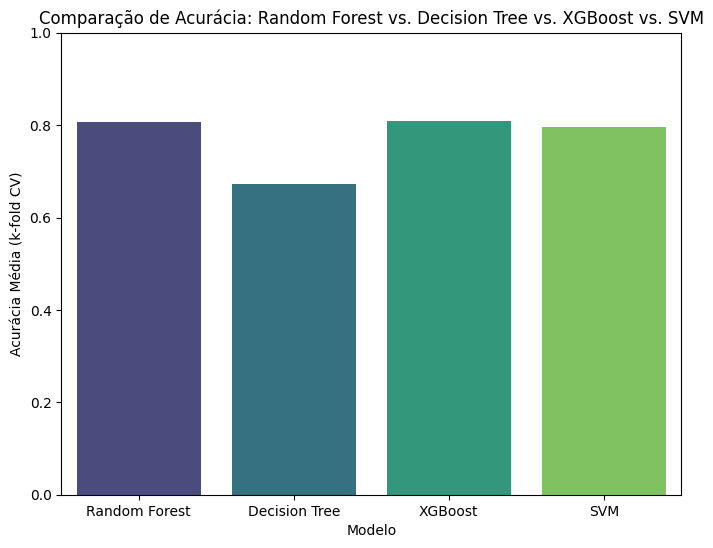

In [13]:
# Gráfico comparando acurácia original e após o tratamento
accuracies = [rf_cv_scores.mean(), dt_cv_scores.mean(), xgb_cv_scores.mean(), svm_cv_scores.mean()]
labels = ['Random Forest', 'Decision Tree', 'XGBoost', 'SVM']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.xlabel('Modelo')
plt.ylabel('Acurácia Média (k-fold CV)')
plt.title('Comparação de Acurácia: Random Forest vs. Decision Tree vs. XGBoost vs. SVM')
plt.show()

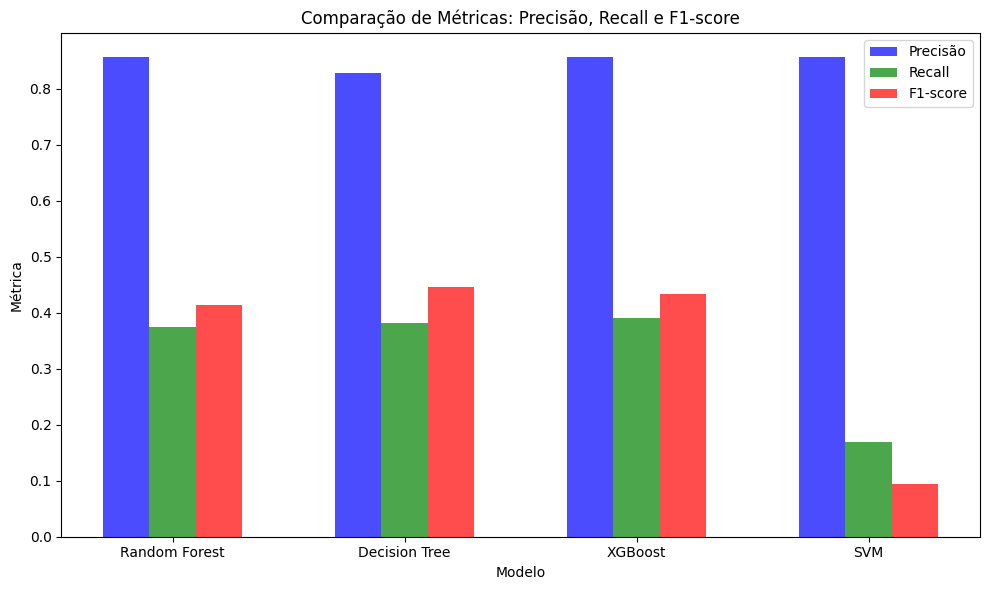

In [20]:
# Métricas para cada modelo (substitua pelos valores reais)
accuracies = [rf_precision, dt_precision, xgb_precision, svm_precision]
recalls = [rf_recall, dt_recall, xgb_recall, svm_recall]
f1_scores = [rf_f1, dt_f1, xgb_f1, svm_f1]
labels = ['Random Forest', 'Decision Tree', 'XGBoost', 'SVM']

# Configurações do gráfico
x = np.arange(len(labels))
width = 0.2

# Criar as barras
plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracies, width, label='Precisão', color='b', alpha=0.7)
plt.bar(x, recalls, width, label='Recall', color='g', alpha=0.7)
plt.bar(x + width, f1_scores, width, label='F1-score', color='r', alpha=0.7)

# Configurar eixos e rótulos
plt.xlabel('Modelo')
plt.ylabel('Métrica')
plt.title('Comparação de Métricas: Precisão, Recall e F1-score')
plt.xticks(x, labels)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()